In [16]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd. read_csv("C:\\Users\\Nehanth\\Desktop\\DSP\\project\\archive\\paysim1.csv")
df.head()

,Unnamed: 0,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [3]:
df = df.drop(columns =['Unnamed: 0'])

In [4]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [5]:
df1 = df.corr()
x = df1.loc['isFraud']
print(x)

step              0.031578
amount            0.076688
oldbalanceOrg     0.010154
newbalanceOrig   -0.008148
oldbalanceDest   -0.005885
newbalanceDest    0.000535
isFraud           1.000000
Name: isFraud, dtype: float64


In [6]:
results = smf.ols('isFraud ~ step+amount', data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                isFraud   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                 2.169e+04
Date:                Tue, 23 Nov 2021   Prob (F-statistic):               0.00
Time:                        17:14:00   Log-Likelihood:             1.2161e+07
No. Observations:             6362620   AIC:                        -2.432e+07
Df Residuals:                 6362617   BIC:                        -2.432e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0014   2.83e-05    -47.864      0.0

In [8]:
from sklearn.linear_model import LinearRegression

x = np.array(df['oldbalanceOrg']).reshape((-1,1))
y = np.array(df['isFraud'])
reg = LinearRegression().fit(x,y)
reg

LinearRegression()

In [9]:
r_sq = reg.score(x,y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.0001031122831144371


In [11]:
x = np.array(df.loc[:,['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'amount']]).reshape((-1,5))
y = np.array(df['isFraud'])
Mreg = LinearRegression().fit(x,y)
Mreg

LinearRegression()

In [12]:
r_sq = Mreg.score(x,y)
print('coeffieicent of determination:', r_sq)

coeffieicent of determination: 0.15515150306910985


In [13]:
print('intercept:', Mreg.intercept_)
print('slope:', Mreg.coef_)

intercept: 0.0013979023338529617
slope: [ 9.74543635e-08 -9.64781709e-08  9.84848418e-09 -9.92777971e-09
  1.36128051e-08]


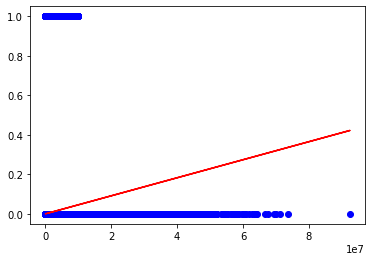

In [17]:
#scatter plot
X = df.iloc[:, [2]].values.reshape(-1,1)
Y = df.iloc[:, [7]].values.reshape(-1,1)
linear_regressor = LinearRegression()
linear_regressor.fit(X,Y)
Y_pred = linear_regressor.predict(X)
plt.scatter(X,Y, color = 'blue')
plt.plot(X,Y_pred, color = 'red')
plt.show()